In [16]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import pandas as pd
import re
import string
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Example loading data
data = pd.read_csv('datasets/songs_cleaned.csv')  # Ensure your dataset has columns 'lyrics' and 'happiness'

data

,Unnamed: 0,artist,lyric,song,valence,words_lyric,lyric_clean_1,words_lyric_c1,lyric_clean_2,words_lyric_c2,lyric_clean_3,words_lyric_c3,lyric_clean_4,words_lyric_c4,language,valence_c
0,0,Elijah Blake,"No, no\r\nI ain't ever trapped out the bando\r...",Everyday,0.626,341,"no, no i ain't ever trapped out the bando but ...",341,no no i aint ever trapped out the bando but oh...,341,aint ever trapped bando oh lord dont get wrong...,221,aint ever trapped bando oh lord dont get wrong...,221,en,2
1,1,Elijah Blake,"The drinks go down and smoke goes up, I feel m...",Live Till We Die,0.630,465,"the drinks go down and smoke goes up, i feel m...",465,the drinks go down and smoke goes up i feel my...,465,drinks go smoke goes feel got let go cares get...,263,drinks go smoke goes feel got let go cares get...,263,en,2
2,2,Elijah Blake,She don't live on planet Earth no more\r\nShe ...,The Otherside,0.240,279,she don't live on planet earth no more she fou...,279,she dont live on planet earth no more she foun...,278,dont live planet earth found love venus thats ...,138,dont live planet earth found love venus thats ...,138,en,0
3,3,Elijah Blake,"Trippin' off that Grigio, mobbin', lights low\...",Pinot,0.536,334,"trippin' off that grigio, mobbin', lights low ...",334,trippin off that grigio mobbin lights low trip...,334,trippin grigio mobbin lights low trippin grigi...,189,trippin grigio mobbin lights low trippin grigi...,189,en,1
4,4,Elijah Blake,"I see a midnight panther, so gallant and so br...",Shadows & Diamonds,0.371,172,"i see a midnight panther, so gallant and so br...",172,i see a midnight panther so gallant and so bra...,171,see midnight panther gallant brave found found...,94,see midnight panther gallant brave found found...,94,en,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149049,158348,Adam Green,"And we live on borrowed time,\r\nBut this head...",Friends of Mine,0.737,160,"and we live on borrowed time, but this headsho...",160,and we live on borrowed time but this headshot...,160,live borrowed time headshots pretty good ive s...,87,live borrowed time headshots pretty good ive s...,87,en,2
149050,158349,Adam Green,Frozin in time forever\r\nCarrying that torch ...,Frozen in Time,0.482,132,frozin in time forever carrying that torch for...,132,frozin in time forever carrying that torch for...,132,frozin time forever carrying torch long hear h...,63,frozin time forever carrying torch long hear h...,63,en,1
149051,158350,Adam Green,Hard to be a girl. \r\nSo nice to be a boy. \r...,Hard to Be a Girl,0.733,91,hard to be a girl. so nice to be a boy. in my ...,91,hard to be a girl so nice to be a boy in my ro...,91,hard girl nice boy room night pretty site here...,39,hard girl nice boy room night pretty site here...,39,en,2
149052,158351,Adam Green,"I want to chose to die,\r\nAnd be buried with ...",I Wanna Die,0.361,101,"i want to chose to die, and be buried with a r...",101,i want to chose to die and be buried with a ru...,101,want chose die buried rubix cube sleep inside ...,55,want chose die buried rubix cube sleep inside ...,55,en,1


In [9]:
#data = data.sample(frac=0.1)

In [10]:
# Preprocessing
tokenizer = Tokenizer(num_words=1500, oov_token="<OOV>")
tokenizer.fit_on_texts(data['lyric_clean_4'])
sequences = tokenizer.texts_to_sequences(data['lyric_clean_4'])
padded_sequences = pad_sequences(sequences, maxlen=200, padding='post', truncating='post')

In [12]:
model = Sequential([
    Embedding(input_dim=1500, output_dim=32),
    Bidirectional(LSTM(32)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(3, activation='softmax')
])


optimizer = Adam(learning_rate=0.0001)
#optimizer = Adam()

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
              optimizer=optimizer, 
              metrics=['accuracy'])

model.summary()


X_train, X_val, y_train, y_val = train_test_split(padded_sequences, 
                                                  data['valence_c'], 
                                                  test_size=0.3, 
                                                  random_state=42)


early_stopping = EarlyStopping(monitor='val_loss', 
                               patience=10, 
                               min_delta=0.001,
                               verbose=1, 
                               mode='min', 
                               restore_best_weights=True)

history = model.fit(X_train, 
                    y_train, 
                    epochs=50, 
                    batch_size = 256,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stopping])

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
408/408 ━━━━━━━━━━━━━━━━━━━━ 49s 112ms/step - accuracy: 0.3462 - loss: 1.6645 - val_accuracy: 0.4373 - val_loss: 1.4382
Epoch 2/50
408/408 ━━━━━━━━━━━━━━━━━━━━ 45s 111ms/step - accuracy: 0.4464 - loss: 1.3742 - val_accuracy: 0.4645 - val_loss: 1.2379
Epoch 3/50
408/408 ━━━━━━━━━━━━━━━━━━━━ 44s 108ms/step - accuracy: 0.4717 - loss: 1.2084 - val_accuracy: 0.4728 - val_loss: 1.1364
Epoch 4/50
408/408 ━━━━━━━━━━━━━━━━━━━━ 44s 107ms/step - accuracy: 0.4806 - loss: 1.1190 - val_accuracy: 0.4753 - val_loss: 1.0818
Epoch 5/50
408/408 ━━━━━━━━━━━━━━━━━━━━ 44s 107ms/step - accuracy: 0.4839 - loss: 1.0695 - val_accuracy: 0.4772 - val_loss: 1.0516
Epoch 6/50
408/408 ━━━━━━━━━━━━━━━━━━━━ 44s 107ms/step - accuracy: 0.4863 - loss: 1.0437 - val_accuracy: 0.4761 - val_loss: 1.0353
Epoch 7/50
408/408 ━━━━━━━━━━━━━━━━━━━━ 44s 108ms/step - accuracy: 0.4875 - loss: 1.0254 - val_accuracy: 0.4785 - val_loss: 1.0274
Epoch 8/50
408/408 ━━━━━━━━━━━━━━━━━━━━ 44s 108ms/step - accuracy: 0.4889 - loss: 1

In [13]:
# Evaluate the model on the validation set
loss, accuracy = model.evaluate(X_val, y_val)
print(f": {accuracy:.2f}")


1398/1398 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.4784 - loss: 1.0145
: 0.48


<Axes: >

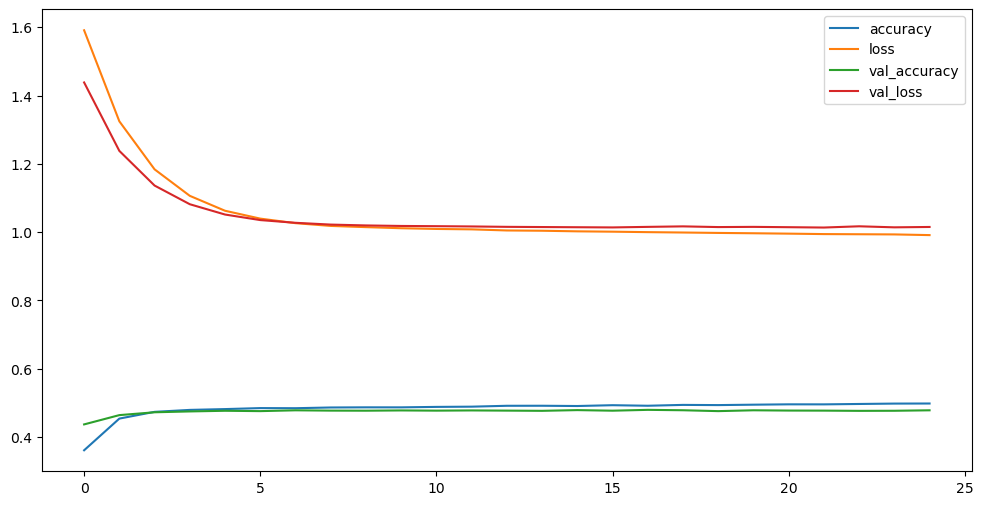

In [14]:
pd.DataFrame(history.history).plot(figsize=(12,6))

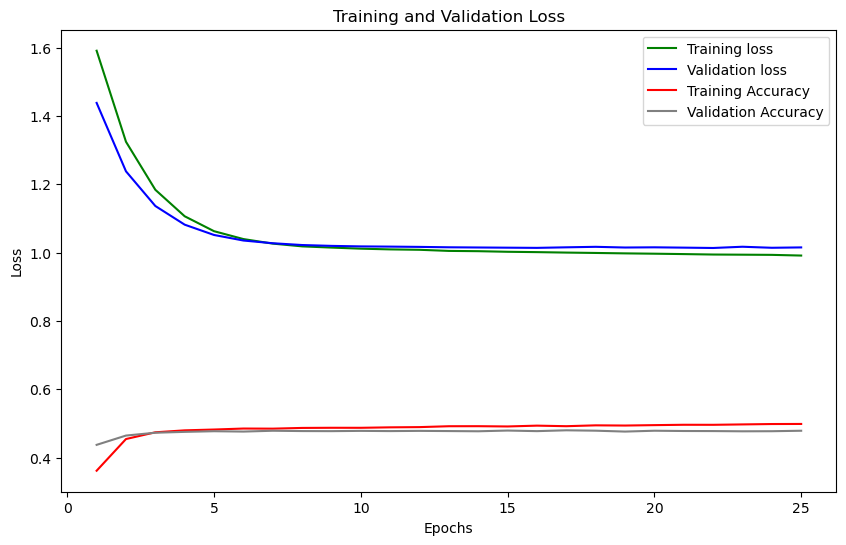

In [17]:
history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.figure(figsize=(10, 6))
plt.plot(epochs, loss_values, 'g', label='Training loss')  # 'bo' gives blue dot
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')  # 'b' gives solid blue line
plt.plot(epochs, acc, 'r', label='Training Accuracy')  # 'ro' gives red dots
plt.plot(epochs, val_acc, 'grey', label='Validation Accuracy')  # 'r' gives solid red line

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()